<a href="https://colab.research.google.com/github/Tarun280896/AI/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from matplotlib import pyplot as plt
import numpy as np

In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


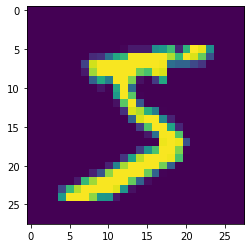

In [4]:
plt.imshow(train_X[0])

In [5]:
train_X.shape

(60000, 28, 28)

In [6]:
#normalizing vectors as each image in mnist contains 784 pixels
train_X = train_X/784
test_X = test_X/784

In [7]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape = (28, 28)))
  model.add(Dense(units=128, activation= 'relu'))
  model.add(Dense(units= 64, activation= 'relu'))
  model.add(Dense(units= 10, activation= 'softmax'))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [30]:
class CustomCallBacks(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('loss') < 0.2:
      print("Reached 80% accuracy ")
      self.model.stop_training = True


In [9]:
callbacks = CustomCallBacks()
model = get_model()
model.fit(train_X,train_y, epochs = 100, validation_split = .2, callbacks= [callbacks])

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5682 - accuracy: 0.8479 - val_loss: 0.1682 - val_accuracy: 0.9503
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1534 - accuracy: 0.9548 - val_loss: 0.1305 - val_accuracy: 0.9618
Reached 80% accuracy on validation set


In [10]:
model.evaluate(test_X,test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.1243 - accuracy: 0.9628


[0.12434075772762299, 0.9628000259399414]

## ---------------------Using CNN ---------------------

In [11]:
from keras.layers import Conv2D, MaxPool2D

In [17]:
def get_reshape(img) :
  return img.reshape(img.shape[0],img.shape[1],img.shape[2], 1)

In [18]:

(train_X,train_y),(test_X,test_y) = mnist.load_data()

In [20]:
train_X,test_X = get_reshape(train_X),get_reshape(test_X)

In [21]:
#normalizing vectors as each image in mnist contains 784 pixels
train_X = train_X/784
test_X = test_X/784

In [27]:
model = Sequential()
# convolution layer 64 filters with shape (3x3) with activate as relu (to remove -ve values)
#input_shape = (28X28 pixels and 1 is the representaion of color depth(as it is a grey scale))
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
#pooling layer with 2x2 pool which means in every 4 pixels we choose only the largest one in the pool 
model.add(MaxPool2D(2,2))
#by using another convolution layer we can again reduce the size of image, which makes easy for the model to predict.
#helps in filtering the features that are used in identifying the output 
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(units = 128, activation= 'relu'))
model.add(Dense(units = 10, activation= 'softmax'))
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [29]:
callbacks = CustomCallBacks()
model.fit(train_X,train_y, epochs= 10, callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3208 - accuracy: 0.8990
Reached 80% accuracy on validation set


In [31]:
model.evaluate(test_X,test_y)

313/313 [==============================] - 4s 11ms/step - loss: 0.0466 - accuracy: 0.9849


[0.04655400663614273, 0.9848999977111816]

## --------visualizing convolution layers--------

In [32]:
print(test_y[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


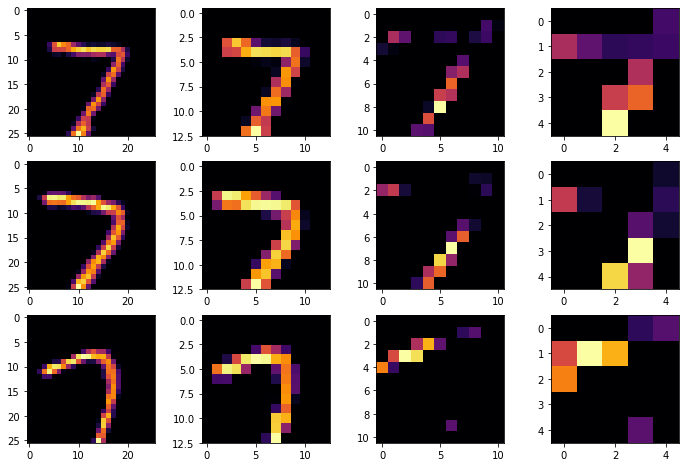

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=17
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_X[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_X[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_X[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)